# Reading inputs

In [1]:
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

In [2]:
with open('/work/omicsbio/paulcalle/Epidural_project/Epidural_data/a_images_1D_5cat.npy', 'rb') as f:
    a_images_1D = np.load(f)
    
with open('/work/omicsbio/paulcalle/Epidural_project/Epidural_data/a_label_5cat.npy', 'rb') as f:
    a_label = np.load(f)

with open('/work/omicsbio/paulcalle/Epidural_project/Epidural_data/a_epidural_num_5cat.npy', 'rb') as f:
    a_epidural_num = np.load(f)

# Transforming labels to numerical categories

In [3]:
a_label_num = np.copy(a_label)

In [4]:
a_label_num[a_label_num == "fat"] = 0
a_label_num[a_label_num == "ligament"] = 1
a_label_num[a_label_num == "flavum"] = 2
a_label_num[a_label_num == "empty"] = 3
a_label_num[a_label_num == "spinalcord"] = 4

In [5]:
a_label_num = a_label_num.astype(int)

In [6]:
a_label_num

array([1, 1, 1, ..., 3, 3, 3])

# Individual 7

| Category    | Images |
| ----------- | ----------- |
| Fat         | 150_e7fat.jpg, 500_e7fat.jpg, 750_e7fat.jpg |
| Ligament    | 250_e7ligament.jpg, 500_e7ligament.jpg, 750_e7ligament.jpg |
| Flavum      | 250_e7flavum.jpg, 600_e7flavum.jpg, 605_e7flavum.jpg |
| Empty       | 300_e7_0.5mm.jpg, 300_e7_1.0mm.jpg, 300_e7_2.0mm.jpg |
| Spinal cord | 250_e7spinalcord.jpg, 500_e7spinalcord.jpg, 700_e7spinalcord.jpg |

## Bin 1: fat vs ligament

In [7]:
from tensorflow.keras import backend as K
K.clear_session()

In [8]:
model_bin1_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/model_outer_K7.h5")

### Mean value

In [9]:
# fat vs ligament
bool_fat_ligament = np.logical_or(a_label == "fat", a_label == "ligament")

a_label_num_bin_fat_ligament_pre = a_label[bool_fat_ligament]
a_label_num_bin_fat_ligament = np.copy(a_label_num_bin_fat_ligament_pre)

# Changing to numeric
a_label_num_bin_fat_ligament[a_label_num_bin_fat_ligament_pre == "fat"] = 0
a_label_num_bin_fat_ligament[a_label_num_bin_fat_ligament_pre == "ligament"] = 1
a_label_num_bin_fat_ligament = a_label_num_bin_fat_ligament.astype(int)

a_images_1D_bin_fat_ligament = a_images_1D[bool_fat_ligament]
a_epidural_num_bin_fat_ligament = a_epidural_num[bool_fat_ligament]

# Individual 7
index = 7

bool_epidural_train = a_epidural_num_bin_fat_ligament != index
bool_epidural_test = ~bool_epidural_train

X_train_raw, X_test_raw = a_images_1D_bin_fat_ligament[bool_epidural_train], a_images_1D_bin_fat_ligament[bool_epidural_test]
y_train, y_test = a_label_num_bin_fat_ligament[bool_epidural_train], a_label_num_bin_fat_ligament[bool_epidural_test]  

# X_train_raw, X_test_raw = a_images_1D[bool_kidney_train], a_images_1D[bool_kidney_test]
# y_train, y_test = a_label_num[bool_kidney_train], a_label_num[bool_kidney_test]


# print("Epidural_val: " + str(index_val) )

# bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
# bool_train_epidural = ~bool_val_epidural

# X_train_raw, X_val_raw = X_cv[bool_train_epidural], X_cv[bool_val_epidural]
# y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]        

# Preprocessing data
# Substracting the mean pixel
# (This is done normally per channel)
mean_train_raw = np.mean(X_train_raw)

# X_train = X_train_raw - mean_train_raw
# X_test = X_test_raw - mean_train_raw

In [10]:
mean_train_raw

84.55753371082736

### Read images and make it darker

In [11]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [12]:
# Read Images 
img_fat_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/150_e7fat.jpg', format = "jpg") 
print(img_fat_1.shape)

(241, 181, 3)


In [13]:
from PIL import Image, ImageEnhance

In [14]:
# https://pythonexamples.org/python-pillow-adjust-image-brightness/

im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/150_e7fat.jpg")

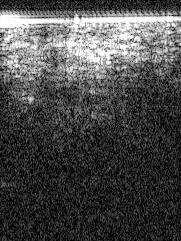

In [15]:
im

In [16]:
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)

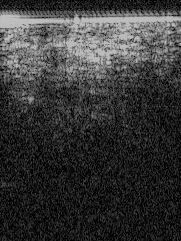

In [17]:
im_output

In [18]:
img_fat_1_darker = np.array(im_output)

In [19]:
img_fat_1_darker.shape

(241, 181, 3)

In [20]:
# Read Images 
img_fat_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7fat.jpg', format = "jpg") 
print(img_fat_2.shape)

(241, 181, 3)


In [21]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7fat.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_fat_2_darker = np.array(im_output)

In [22]:
# Read Images 
img_fat_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/750_e7fat.jpg', format = "jpg") 
print(img_fat_3.shape)

(241, 181, 3)


In [23]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/750_e7fat.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_fat_3_darker = np.array(im_output)

In [24]:
# Read Images 
img_ligament_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7ligament.jpg', format = "jpg") 
print(img_ligament_1.shape)

(241, 181, 3)


In [25]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7ligament.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_ligament_1_darker = np.array(im_output)

In [26]:
# Read Images 
img_ligament_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7ligament.jpg', format = "jpg") 
print(img_ligament_2.shape)

(241, 181, 3)


In [27]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7ligament.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_ligament_2_darker = np.array(im_output)

In [28]:
# Read Images 
img_ligament_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/750_e7ligament.jpg', format = "jpg") 
print(img_ligament_3.shape)

(241, 181, 3)


In [29]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/750_e7ligament.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_ligament_3_darker = np.array(im_output)

### Preprocess & Predict

In [30]:
img_fat_1_pre_processed = (img_fat_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_fat_1_pre_processed.shape

(1, 241, 181, 1)

In [31]:
model_bin1_K7.predict(img_fat_1_pre_processed)

array([[0.6467918, 0.3532082]], dtype=float32)

In [32]:
img_fat_2_pre_processed = (img_fat_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_fat_2_pre_processed.shape

(1, 241, 181, 1)

In [33]:
model_bin1_K7.predict(img_fat_2_pre_processed)

array([[9.9997997e-01, 2.0044661e-05]], dtype=float32)

In [34]:
img_fat_3_pre_processed = (img_fat_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_fat_3_pre_processed.shape

(1, 241, 181, 1)

In [35]:
model_bin1_K7.predict(img_fat_3_pre_processed)

array([[9.999540e-01, 4.604043e-05]], dtype=float32)

In [36]:
img_ligament_1_pre_processed = (img_ligament_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_ligament_1_pre_processed.shape

(1, 241, 181, 1)

In [37]:
model_bin1_K7.predict(img_ligament_1_pre_processed)

array([[2.9120452e-04, 9.9970871e-01]], dtype=float32)

In [38]:
img_ligament_2_pre_processed = (img_ligament_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_ligament_2_pre_processed.shape

(1, 241, 181, 1)

In [39]:
model_bin1_K7.predict(img_ligament_2_pre_processed)

array([[6.350401e-08, 9.999999e-01]], dtype=float32)

In [40]:
img_ligament_3_pre_processed = (img_ligament_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_ligament_3_pre_processed.shape

(1, 241, 181, 1)

In [41]:
model_bin1_K7.predict(img_ligament_3_pre_processed)

array([[8.815945e-10, 1.000000e+00]], dtype=float32)

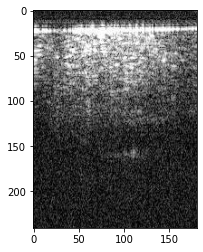

In [42]:
plt.imshow(img_fat_2)

### GradCAM

In [43]:
# There were some problems with K.gradients
# This lines solved it

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Source: https://github.com/tensorflow/tensorflow/issues/33135

In [44]:
from tensorflow.keras import backend as K
K.clear_session()

In [45]:
model_bin1_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin1_test_results/model_outer_K7.h5")

#### Fat 1 darker

In [46]:
# This is the "fat" entry in the prediction vector
fat_output = model_bin1_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin1_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(fat_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin1_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_fat_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [47]:
import matplotlib.pyplot as plt

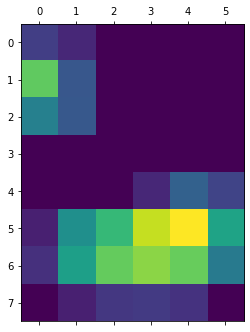

In [48]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [49]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_fat_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin1_fat1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.18379359
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  46
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [255  56   0]


True

#### Fat 2 darker

In [50]:
# This is the "fat" entry in the prediction vector
fat_output = model_bin1_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin1_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(fat_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin1_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_fat_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [51]:
import matplotlib.pyplot as plt

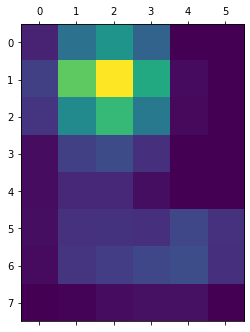

In [52]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [53]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_fat_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin1_fat2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.09775077
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  24
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [224   0   0]


True

#### Fat 3 darker

In [54]:
# This is the "fat" entry in the prediction vector
fat_output = model_bin1_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin1_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(fat_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin1_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_fat_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [55]:
import matplotlib.pyplot as plt

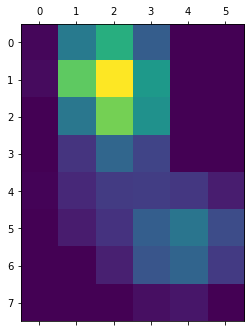

In [56]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [57]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_fat_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin1_fat3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.018001622
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  4
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [144   0   0]


True

#### Ligament 1 darker

In [74]:
# This is the "ligament" entry in the prediction vector
ligament_output = model_bin1_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin1_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(ligament_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin1_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_ligament_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [75]:
import matplotlib.pyplot as plt

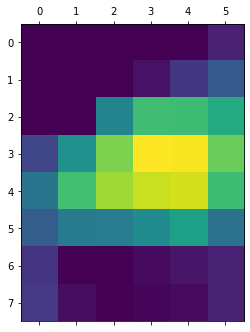

In [76]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [77]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_ligament_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin1_ligament1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Ligament 2 darker

In [79]:
# This is the "ligament" entry in the prediction vector
ligament_output = model_bin1_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin1_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(ligament_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin1_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_ligament_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [80]:
import matplotlib.pyplot as plt

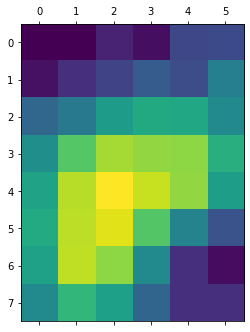

In [81]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [82]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_ligament_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin1_ligament2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Ligament 3 darker

In [83]:
# This is the "ligament" entry in the prediction vector
ligament_output = model_bin1_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin1_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(ligament_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin1_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_ligament_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [84]:
import matplotlib.pyplot as plt

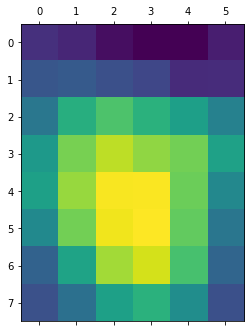

In [85]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [86]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_ligament_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin1_ligament3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.13809851
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  35
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [255  12   0]


True

## Bin 2: ligament vs flavum

In [368]:
from tensorflow.keras import backend as K
K.clear_session()

In [369]:
model_bin2_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/model_outer_K7.h5")

### Mean value

In [370]:
# ligament vs flavum
bool_ligament_flavum = np.logical_or(a_label == "ligament", a_label == "flavum" )

a_label_num_bin_ligament_flavum_pre = a_label[bool_ligament_flavum]
a_label_num_bin_ligament_flavum = np.copy(a_label_num_bin_ligament_flavum_pre)

# Changing to numeric
a_label_num_bin_ligament_flavum[a_label_num_bin_ligament_flavum_pre == "ligament"] = 0
a_label_num_bin_ligament_flavum[a_label_num_bin_ligament_flavum_pre == "flavum"] = 1
a_label_num_bin_ligament_flavum = a_label_num_bin_ligament_flavum.astype(int)

a_images_1D_bin_ligament_flavum = a_images_1D[bool_ligament_flavum]
a_epidural_num_bin_ligament_flavum = a_epidural_num[bool_ligament_flavum]

# Individual 7
index = 7

bool_epidural_train = a_epidural_num_bin_ligament_flavum != index
bool_epidural_test = ~bool_epidural_train

X_train_raw, X_test_raw = a_images_1D_bin_ligament_flavum[bool_epidural_train], a_images_1D_bin_ligament_flavum[bool_epidural_test]
y_train, y_test = a_label_num_bin_ligament_flavum[bool_epidural_train], a_label_num_bin_ligament_flavum[bool_epidural_test]  

# X_train_raw, X_test_raw = a_images_1D[bool_kidney_train], a_images_1D[bool_kidney_test]
# y_train, y_test = a_label_num[bool_kidney_train], a_label_num[bool_kidney_test]


# print("Epidural_val: " + str(index_val) )

# bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
# bool_train_epidural = ~bool_val_epidural

# X_train_raw, X_val_raw = X_cv[bool_train_epidural], X_cv[bool_val_epidural]
# y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]        

# Preprocessing data
# Substracting the mean pixel
# (This is done normally per channel)
mean_train_raw = np.mean(X_train_raw)

# X_train = X_train_raw - mean_train_raw
# X_test = X_test_raw - mean_train_raw

In [371]:
mean_train_raw

84.58325397171087

In [372]:
model_bin2_K7.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 241, 181, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 247, 187, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 121, 91, 64)  3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 121, 91, 64)  256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [ ]:
keras.utils.plot_model(model_bin2_K7, "model_50_bin2_test_I1.png", show_shapes=True)

### Read images and make it darker

In [373]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [374]:
from PIL import Image, ImageEnhance

In [375]:
# Read Images 
img_ligament_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7ligament.jpg', format = "jpg") 
print(img_ligament_1.shape)

(241, 181, 3)


In [376]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7ligament.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_ligament_1_darker = np.array(im_output)

In [377]:
# Read Images 
img_ligament_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7ligament.jpg', format = "jpg") 
print(img_ligament_2.shape)

(241, 181, 3)


In [378]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7ligament.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_ligament_2_darker = np.array(im_output)

In [379]:
# Read Images 
img_ligament_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/750_e7ligament.jpg', format = "jpg") 
print(img_ligament_3.shape)

(241, 181, 3)


In [380]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/750_e7ligament.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_ligament_3_darker = np.array(im_output)

In [381]:
# Read Images 
img_flavum_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7flavum.jpg', format = "jpg") 
print(img_flavum_1.shape)

(241, 181, 3)


In [382]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7flavum.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_flavum_1_darker = np.array(im_output)

In [383]:
# Read Images 
img_flavum_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/600_e7flavum.jpg', format = "jpg") 
print(img_flavum_2.shape)

(241, 181, 3)


In [384]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/600_e7flavum.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_flavum_2_darker = np.array(im_output)

In [385]:
# Read Images 
img_flavum_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/605_e7flavum.jpg', format = "jpg") 
print(img_flavum_3.shape)

(241, 181, 3)


In [386]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/605_e7flavum.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_flavum_3_darker = np.array(im_output)

### Preprocess & Predict

In [387]:
img_ligament_1_pre_processed = (img_ligament_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_ligament_1_pre_processed.shape

(1, 241, 181, 1)

In [388]:
model_bin2_K7.predict(img_ligament_1_pre_processed)

array([[9.9967921e-01, 3.2085946e-04]], dtype=float32)

In [389]:
img_ligament_2_pre_processed = (img_ligament_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_ligament_2_pre_processed.shape

(1, 241, 181, 1)

In [390]:
model_bin2_K7.predict(img_ligament_2_pre_processed)

array([[1.0000000e+00, 4.4580897e-08]], dtype=float32)

In [391]:
img_ligament_3_pre_processed = (img_ligament_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_ligament_3_pre_processed.shape

(1, 241, 181, 1)

In [392]:
model_bin2_K7.predict(img_ligament_3_pre_processed)

array([[1.0000000e+00, 4.3062787e-10]], dtype=float32)

In [393]:
img_flavum_1_pre_processed = (img_flavum_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_flavum_1_pre_processed.shape

(1, 241, 181, 1)

In [394]:
model_bin2_K7.predict(img_flavum_1_pre_processed)

array([[0.00122815, 0.99877185]], dtype=float32)

In [395]:
img_flavum_2_pre_processed = (img_flavum_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_flavum_2_pre_processed.shape

(1, 241, 181, 1)

In [396]:
model_bin2_K7.predict(img_flavum_2_pre_processed)

array([[1.7428172e-05, 9.9998260e-01]], dtype=float32)

In [397]:
img_flavum_3_pre_processed = (img_flavum_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_flavum_3_pre_processed.shape

(1, 241, 181, 1)

In [398]:
model_bin2_K7.predict(img_flavum_3_pre_processed)

array([[1.256550e-05, 9.999875e-01]], dtype=float32)

### GradCAM

In [283]:
from tensorflow.keras import backend as K
K.clear_session()

In [284]:
model_bin2_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin2_test_results/model_outer_K7.h5")

In [285]:
# There were some problems with K.gradients
# This lines solved it

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Source: https://github.com/tensorflow/tensorflow/issues/33135

#### Ligament 1 darker

In [120]:
# This is the "fat" entry in the prediction vector
ligament_output = model_bin2_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin2_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(ligament_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin2_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_ligament_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [121]:
import matplotlib.pyplot as plt

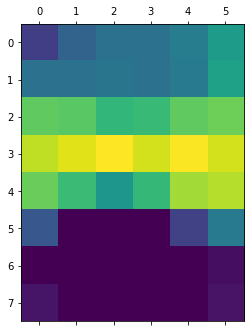

In [122]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [123]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_ligament_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin2_ligament1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.18486054
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  47
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [255  60   0]


True

#### Ligament 2 darker

In [124]:
# This is the "fat" entry in the prediction vector
ligament_output = model_bin2_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin2_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(ligament_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin2_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_ligament_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [125]:
import matplotlib.pyplot as plt

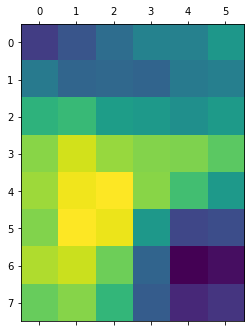

In [126]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [127]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_ligament_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin2_ligament2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.18138668
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  46
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [255  56   0]


True

#### Ligament 3 darker

In [128]:
# This is the "fat" entry in the prediction vector
ligament_output = model_bin2_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin2_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(ligament_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin2_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_ligament_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [129]:
import matplotlib.pyplot as plt

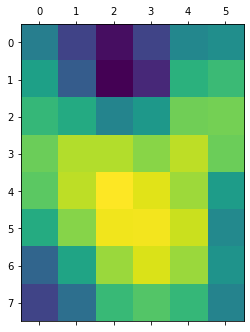

In [130]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [131]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_ligament_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin2_ligament3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.4861126
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  123
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [146 255 110]


True

#### Flavum 1 darker

In [286]:
# This is the "fat" entry in the prediction vector
flavum_output = model_bin2_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin2_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(flavum_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin2_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_flavum_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [287]:
import matplotlib.pyplot as plt

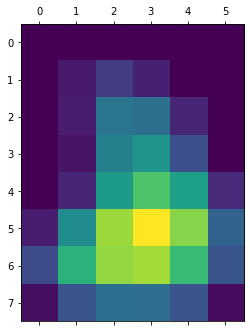

In [288]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [289]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_flavum_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin2_flavum1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Flavum 2 darker

In [290]:
# This is the "fat" entry in the prediction vector
flavum_output = model_bin2_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin2_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(flavum_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin2_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_flavum_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [291]:
import matplotlib.pyplot as plt

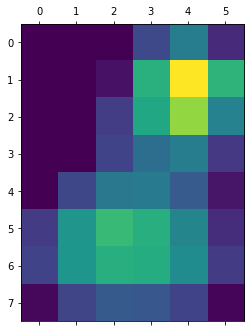

In [292]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [293]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_flavum_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin2_flavum2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Flavum 3 darker

In [399]:
# This is the "fat" entry in the prediction vector
flavum_output = model_bin2_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin2_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(flavum_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin2_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_flavum_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [400]:
import matplotlib.pyplot as plt

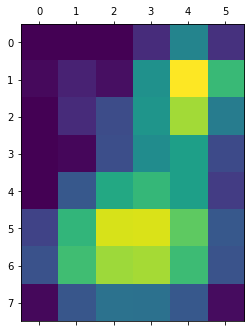

In [401]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [402]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_flavum_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin2_flavum3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

## Bin 3: flavum vs empty

In [77]:
from tensorflow.keras import backend as K
K.clear_session()

In [78]:
model_bin3_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/model_outer_K7.h5")

### Mean value

In [79]:
# flavum vs empty
bool_flavum_empty = np.logical_or(a_label == "flavum", a_label == "empty" )

a_label_num_bin_flavum_empty_pre = a_label[bool_flavum_empty]
a_label_num_bin_flavum_empty = np.copy(a_label_num_bin_flavum_empty_pre)

# Changing to numeric
a_label_num_bin_flavum_empty[a_label_num_bin_flavum_empty_pre == "flavum"] = 0
a_label_num_bin_flavum_empty[a_label_num_bin_flavum_empty_pre == "empty"] = 1
a_label_num_bin_flavum_empty = a_label_num_bin_flavum_empty.astype(int)

a_images_1D_bin_flavum_empty = a_images_1D[bool_flavum_empty]
a_epidural_num_bin_flavum_empty = a_epidural_num[bool_flavum_empty]

# Individual 7
index = 7

bool_epidural_train = a_epidural_num_bin_flavum_empty != index
bool_epidural_test = ~bool_epidural_train

X_train_raw, X_test_raw = a_images_1D_bin_flavum_empty[bool_epidural_train], a_images_1D_bin_flavum_empty[bool_epidural_test]
y_train, y_test = a_label_num_bin_flavum_empty[bool_epidural_train], a_label_num_bin_flavum_empty[bool_epidural_test]  

# X_train_raw, X_test_raw = a_images_1D[bool_kidney_train], a_images_1D[bool_kidney_test]
# y_train, y_test = a_label_num[bool_kidney_train], a_label_num[bool_kidney_test]


# print("Epidural_val: " + str(index_val) )

# bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
# bool_train_epidural = ~bool_val_epidural

# X_train_raw, X_val_raw = X_cv[bool_train_epidural], X_cv[bool_val_epidural]
# y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]        

# Preprocessing data
# Substracting the mean pixel
# (This is done normally per channel)
mean_train_raw = np.mean(X_train_raw)

In [80]:
mean_train_raw

52.16647525765768

In [81]:
model_bin3_K7.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 241, 181, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 247, 187, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 121, 91, 64)  3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 121, 91, 64)  256         conv1_conv[0][0]                 
_______________________________________________________________________________________

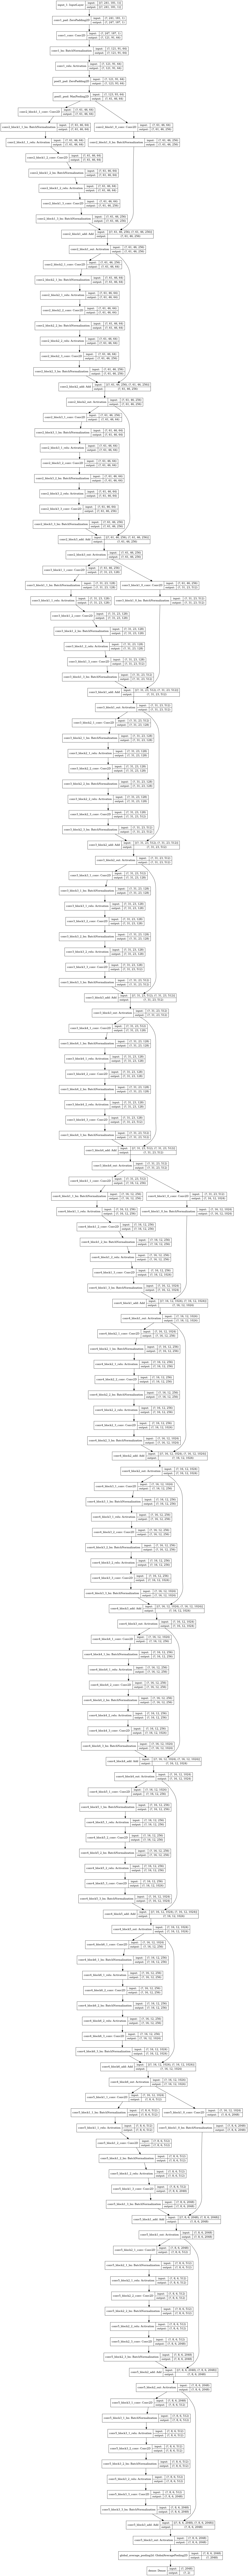

In [82]:
keras.utils.plot_model(model_bin3_K7, "model_50_bin3_test_I1.png", show_shapes=True)

### Read images and make it darker

In [113]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [114]:
from PIL import Image, ImageEnhance

In [115]:
# Read Images 
img_flavum_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7flavum.jpg', format = "jpg") 
print(img_flavum_1.shape)

(241, 181, 3)


In [116]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7flavum.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_flavum_1_darker = np.array(im_output)

In [117]:
# Read Images 
img_flavum_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/600_e7flavum.jpg', format = "jpg") 
print(img_flavum_2.shape)

(241, 181, 3)


In [118]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/600_e7flavum.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_flavum_2_darker = np.array(im_output)

In [119]:
# Read Images 
img_flavum_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/605_e7flavum.jpg', format = "jpg") 
print(img_flavum_3.shape)

(241, 181, 3)


In [120]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/605_e7flavum.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_flavum_3_darker = np.array(im_output)

In [121]:
# Read Images 
img_empty_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_0.5mm.jpg', format = "jpg") 
print(img_empty_1.shape)

(241, 181, 3)


In [122]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_0.5mm.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_empty_1_darker = np.array(im_output)

In [123]:
# Read Images 
img_empty_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_1.0mm.jpg', format = "jpg") 
print(img_empty_2.shape)

(241, 181, 3)


In [124]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_1.0mm.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_empty_2_darker = np.array(im_output)

In [125]:
# Read Images 
img_empty_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_2.0mm.jpg', format = "jpg") 
print(img_empty_3.shape)

(241, 181, 3)


In [126]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_2.0mm.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_empty_3_darker = np.array(im_output)

### Preprocess & Predict

In [127]:
img_flavum_1_pre_processed = (img_flavum_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_flavum_1_pre_processed.shape

(1, 241, 181, 1)

In [128]:
model_bin3_K7.predict(img_flavum_1_pre_processed)

array([[1.0000000e+00, 3.0103323e-16]], dtype=float32)

In [129]:
img_flavum_2_pre_processed = (img_flavum_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_flavum_2_pre_processed.shape

(1, 241, 181, 1)

In [130]:
model_bin3_K7.predict(img_flavum_2_pre_processed)

array([[1.0000000e+00, 3.0640987e-33]], dtype=float32)

In [131]:
img_flavum_3_pre_processed = (img_flavum_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_flavum_3_pre_processed.shape

(1, 241, 181, 1)

In [132]:
model_bin3_K7.predict(img_flavum_3_pre_processed)

array([[1.0000000e+00, 3.3173042e-33]], dtype=float32)

In [133]:
img_empty_1_pre_processed = (img_empty_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_empty_1_pre_processed.shape

(1, 241, 181, 1)

In [134]:
model_bin3_K7.predict(img_empty_1_pre_processed)

array([[2.2723881e-07, 9.9999976e-01]], dtype=float32)

In [135]:
img_empty_2_pre_processed = (img_empty_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_empty_2_pre_processed.shape

(1, 241, 181, 1)

In [136]:
model_bin3_K7.predict(img_empty_2_pre_processed)

array([[1.3735804e-08, 1.0000000e+00]], dtype=float32)

In [137]:
img_empty_3_pre_processed = (img_empty_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_empty_3_pre_processed.shape

(1, 241, 181, 1)

In [138]:
model_bin3_K7.predict(img_empty_3_pre_processed)

array([[5.923955e-09, 1.000000e+00]], dtype=float32)

### GradCAM

In [74]:
# There were some problems with K.gradients
# This lines solved it

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Source: https://github.com/tensorflow/tensorflow/issues/33135

In [75]:
from tensorflow.keras import backend as K
K.clear_session()

In [76]:
model_bin3_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin3b_test_results/model_outer_K7.h5")

#### Flavum 1 darker

In [437]:
# This is the "fat" entry in the prediction vector
flavum_output = model_bin3_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(flavum_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_flavum_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [438]:
import matplotlib.pyplot as plt

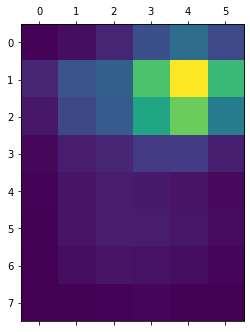

In [439]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [440]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_flavum_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_flavum1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.010349596
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  2
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [136   0   0]


True

#### Flavum 2 darker

In [441]:
# This is the "fat" entry in the prediction vector
flavum_output = model_bin3_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(flavum_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_flavum_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [442]:
import matplotlib.pyplot as plt

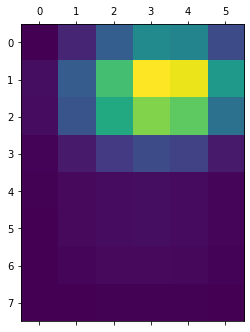

In [443]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [444]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_flavum_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_flavum2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.00023923977
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Flavum 3 darker

In [445]:
# This is the "fat" entry in the prediction vector
flavum_output = model_bin3_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(flavum_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_flavum_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [446]:
import matplotlib.pyplot as plt

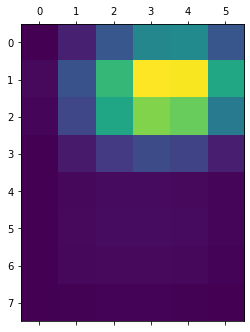

In [447]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [448]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_flavum_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_flavum3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Empty 1

In [139]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin3_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [140]:
import matplotlib.pyplot as plt

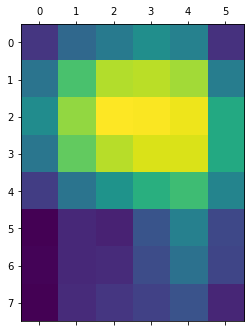

In [141]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [142]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_1


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_empty1_lighter_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.4981303
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  127
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [130 255 126]


True

#### Empty 1 darker

In [449]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin3_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [450]:
import matplotlib.pyplot as plt

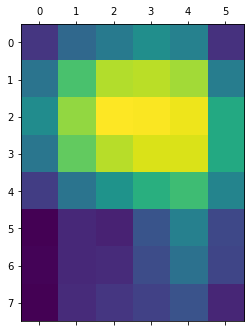

In [451]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [452]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_empty1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.4981303
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  127
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [130 255 126]


True

#### Empty 2

In [143]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin3_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [144]:
import matplotlib.pyplot as plt

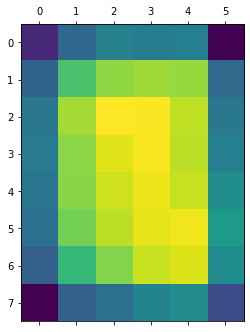

In [145]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [146]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_2


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_empty2_lighter_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.5271163
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  134
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [102 255 154]


True

#### Empty 2 darker

In [453]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin3_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [454]:
import matplotlib.pyplot as plt

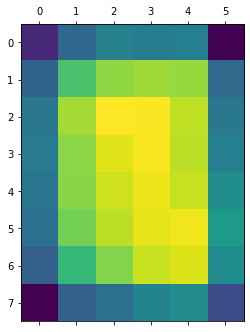

In [455]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [456]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_empty2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.5271163
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  134
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [102 255 154]


True

#### Empty 3

In [147]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin3_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [148]:
import matplotlib.pyplot as plt

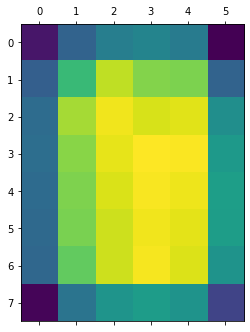

In [149]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [150]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_3


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_empty3_lighter_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.5031406
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  128
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [126 255 130]


True

#### Empty 3 darker

In [457]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin3_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin3_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin3_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [458]:
import matplotlib.pyplot as plt

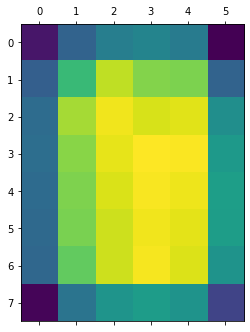

In [459]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [460]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin3_empty3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.5031406
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  128
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [126 255 130]


True

## Bin 4:empty vs spinal cord

In [151]:
from tensorflow.keras import backend as K
K.clear_session()

In [152]:
model_bin4_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/model_outer_K7.h5")

### Mean value

In [153]:
# empty vs spinalcord
bool_empty_spinalcord = np.logical_or(a_label == "empty", a_label == "spinalcord" )

a_label_num_bin_empty_spinalcord_pre = a_label[bool_empty_spinalcord]
a_label_num_bin_empty_spinalcord = np.copy(a_label_num_bin_empty_spinalcord_pre)

# Changing to numeric
a_label_num_bin_empty_spinalcord[a_label_num_bin_empty_spinalcord_pre == "empty"] = 0
a_label_num_bin_empty_spinalcord[a_label_num_bin_empty_spinalcord_pre == "spinalcord"] = 1
a_label_num_bin_empty_spinalcord = a_label_num_bin_empty_spinalcord.astype(int)

a_images_1D_bin_empty_spinalcord = a_images_1D[bool_empty_spinalcord]
a_epidural_num_bin_empty_spinalcord = a_epidural_num[bool_empty_spinalcord]

# Individual 7
index = 7

bool_epidural_train = a_epidural_num_bin_empty_spinalcord != index
bool_epidural_test = ~bool_epidural_train

X_train_raw, X_test_raw = a_images_1D_bin_empty_spinalcord[bool_epidural_train], a_images_1D_bin_empty_spinalcord[bool_epidural_test]
y_train, y_test = a_label_num_bin_empty_spinalcord[bool_epidural_train], a_label_num_bin_empty_spinalcord[bool_epidural_test]  

# X_train_raw, X_test_raw = a_images_1D[bool_kidney_train], a_images_1D[bool_kidney_test]
# y_train, y_test = a_label_num[bool_kidney_train], a_label_num[bool_kidney_test]


# print("Epidural_val: " + str(index_val) )

# bool_val_epidural = ( a_epidural_num_7_epidurals == index_val )
# bool_train_epidural = ~bool_val_epidural

# X_train_raw, X_val_raw = X_cv[bool_train_epidural], X_cv[bool_val_epidural]
# y_train, y_val = y_cv[bool_train_epidural], y_cv[bool_val_epidural]        

# Preprocessing data
# Substracting the mean pixel
# (This is done normally per channel)
mean_train_raw = np.mean(X_train_raw)

In [154]:
mean_train_raw

50.24490304145775

In [155]:
model_bin4_K7.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 241, 181, 1) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 247, 187, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 121, 91, 64)  3200        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 121, 91, 64)  256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [156]:
keras.utils.plot_model(model_bin4_K1, "model_50_bin4_test_I1.png", show_shapes=True)

NameError: name 'model_bin4_K1' is not defined

### Read images and make it darker

In [ ]:
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 

In [ ]:
from PIL import Image, ImageEnhance

In [ ]:
# Read Images 
img_empty_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_0.5mm.jpg', format = "jpg") 
print(img_empty_1.shape)

In [ ]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_0.5mm.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_empty_1_darker = np.array(im_output)

In [ ]:
# Read Images 
img_empty_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_1.0mm.jpg', format = "jpg") 
print(img_empty_2.shape)

In [ ]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_1.0mm.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_empty_2_darker = np.array(im_output)

In [ ]:
# Read Images 
img_empty_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_2.0mm.jpg', format = "jpg") 
print(img_empty_3.shape)

In [ ]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/300_e7_2.0mm.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_empty_3_darker = np.array(im_output)

In [ ]:
# Read Images 
img_spinalcord_1 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7spinalcord.jpg', format = "jpg") 
print(img_spinalcord_1.shape)

In [ ]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/250_e7spinalcord.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_spinalcord_1_darker = np.array(im_output)

In [ ]:
# Read Images 
img_spinalcord_2 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7spinalcord.jpg', format = "jpg") 
print(img_spinalcord_2.shape)

In [ ]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/500_e7spinalcord.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_spinalcord_2_darker = np.array(im_output)

In [ ]:
# Read Images 
img_spinalcord_3 = mpimg.imread('/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/700_e7spinalcord.jpg', format = "jpg") 
print(img_spinalcord_3.shape)

In [ ]:
im = Image.open("/work/omicsbio/paulcalle/Epidural_project/GradCAM input_images/S7/700_e7spinalcord.jpg")
enhancer = ImageEnhance.Brightness(im)
factor = 0.75 #darkens the image
im_output = enhancer.enhance(factor)
img_spinalcord_3_darker = np.array(im_output)

### Preprocess & Predict

In [ ]:
img_empty_1_pre_processed = (img_empty_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_empty_1_pre_processed.shape

In [ ]:
model_bin4_K7.predict(img_empty_1_pre_processed)

In [ ]:
img_empty_2_pre_processed = (img_empty_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_empty_2_pre_processed.shape

In [ ]:
model_bin4_K7.predict(img_empty_2_pre_processed)

In [ ]:
img_empty_3_pre_processed = (img_empty_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_empty_3_pre_processed.shape

In [ ]:
model_bin4_K7.predict(img_empty_3_pre_processed)

In [ ]:
img_spinalcord_1_pre_processed = (img_spinalcord_1[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_spinalcord_1_pre_processed.shape

In [ ]:
model_bin4_K7.predict(img_spinalcord_1_pre_processed)

In [ ]:
img_spinalcord_2_pre_processed = (img_spinalcord_2[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_spinalcord_2_pre_processed.shape

In [ ]:
model_bin4_K7.predict(img_spinalcord_2_pre_processed)

In [ ]:
img_spinalcord_3_pre_processed = (img_spinalcord_3[:,:,0] - mean_train_raw)[np.newaxis,...,np.newaxis]
img_spinalcord_3_pre_processed.shape

In [ ]:
model_bin4_K7.predict(img_spinalcord_3_pre_processed)

### GradCAM

In [157]:
# There were some problems with K.gradients
# This lines solved it

import tensorflow as tf
tf.compat.v1.disable_eager_execution()
# Source: https://github.com/tensorflow/tensorflow/issues/33135

In [158]:
from tensorflow.keras import backend as K
K.clear_session()

In [159]:
model_bin4_K7 = keras.models.load_model("/scratch/paulcalle/Epidural_results/archRESNET50_bin4_test_results/model_outer_K7.h5")

#### Empty 1

In [160]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin4_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [161]:
import matplotlib.pyplot as plt

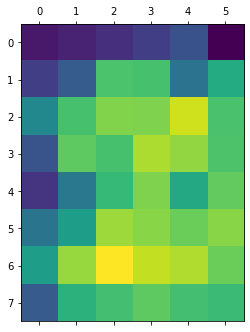

In [162]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [163]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_1


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_empty1_lighter_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.6973522
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  177
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [  0 184 255]


True

#### Empty 1 darker

In [496]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin4_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [497]:
import matplotlib.pyplot as plt

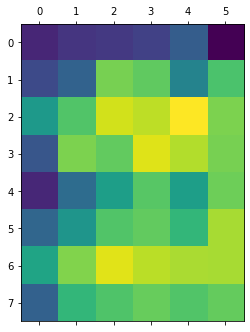

In [498]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [499]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_empty1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.7325192
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  186
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [  0 148 255]


True

#### Empty 2

In [164]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin4_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [165]:
import matplotlib.pyplot as plt

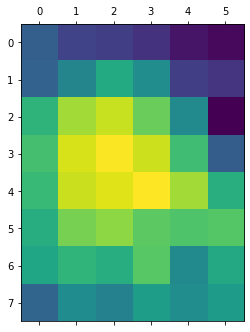

In [166]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [167]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_2


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_empty2_lighter_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.7075804
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  180
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [  0 172 255]


True

#### Empty 2 darker

In [500]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin4_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [501]:
import matplotlib.pyplot as plt

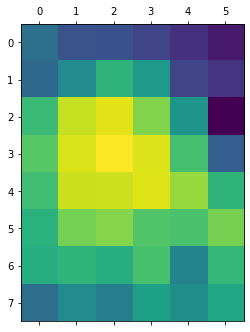

In [502]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [503]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_empty2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.7379158
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  188
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [  0 140 255]


True

#### Empty 3

In [168]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin4_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [169]:
import matplotlib.pyplot as plt

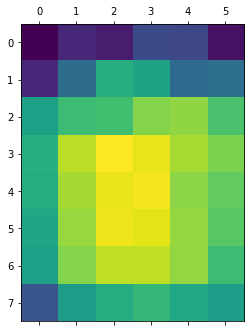

In [170]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [171]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_3


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_empty3_lighter_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.60776615
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  154
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [ 22 255 234]


True

#### Empty 3 darker

In [504]:
# This is the "fat" entry in the prediction vector
empty_output = model_bin4_K7.output[:, 0]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(empty_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_empty_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [505]:
import matplotlib.pyplot as plt

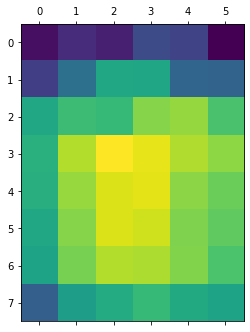

In [506]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [507]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_empty_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_empty3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.6129527
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  156
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [ 14 255 242]


True

#### Spinal cord 1 darker

In [508]:
# This is the "fat" entry in the prediction vector
spinalcord_output = model_bin4_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(spinalcord_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_spinalcord_1_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [509]:
import matplotlib.pyplot as plt

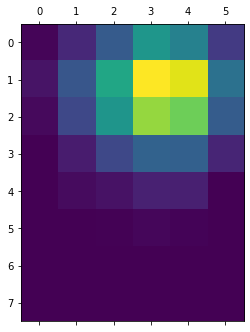

In [510]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [511]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_spinalcord_1_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_spinalcord1_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.011988938
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  3
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [140   0   0]


True

#### Spinal cord 2 darker

In [512]:
# This is the "fat" entry in the prediction vector
spinalcord_output = model_bin4_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(spinalcord_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_spinalcord_2_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [513]:
import matplotlib.pyplot as plt

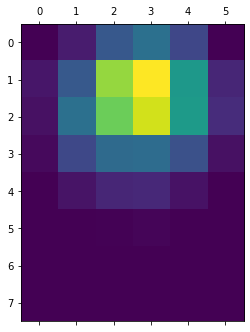

In [514]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [515]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_spinalcord_2_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_spinalcord2_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.0
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [128   0   0]


True

#### Spinal cord 3 darker

In [516]:
# This is the "fat" entry in the prediction vector
spinalcord_output = model_bin4_K7.output[:, 1]

# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model_bin4_K7.get_layer('conv5_block3_out')

# This is the gradient of the "african elephant" class with regard to
# the output feature map of `block5_conv3`
grads = K.gradients(spinalcord_output, last_conv_layer.output)[0]
# grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

# This is a vector of shape (2048,), where each entry
# is the mean intensity of the gradient over a specific feature map channel
pooled_grads = K.mean(grads, axis=(0, 1, 2))

# This function allows us to access the values of the quantities we just defined:
# `pooled_grads` and the output feature map of `conv5_block3_out`,
# given a sample image
iterate = K.function([model_bin4_K7.input], [pooled_grads, last_conv_layer.output[0]])

# These are the values of these two quantities, as Numpy arrays,
# given our sample image of two elephants
pooled_grads_value, conv_layer_output_value = iterate([img_spinalcord_3_pre_processed])

# We multiply each channel in the feature map array
# by "how important this channel is" with regard to the medulla class
for i in range(2048):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# The channel-wise mean of the resulting feature map
# is our heatmap of class activation
heatmap = np.mean(conv_layer_output_value, axis=-1)

In [517]:
import matplotlib.pyplot as plt

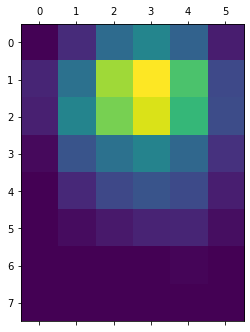

In [518]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

In [519]:
import cv2

# We use cv2 to load the original image
# img = cv2.imread(img_path)

# We resize the heatmap to have the same size as the original image
heatmap = cv2.resize(heatmap, ( 181, 241))

print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# We apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
print("1:heatmap")
print("heatmap.shape = ", heatmap.shape)
print("heatmap[0][0] = ", heatmap[0][0])

# 0.4 here is a heatmap intensity factor
# superimposed_img = heatmap[:,:,0] * 0.4 + X_test[0][..., np.newaxis]
superimposed_img = heatmap * 0.4 + img_spinalcord_3_darker


# Save the image to disk
cv2.imwrite('./GradCAM_output_images/S7/test_S7_bin4_spinalcord3_darker_0.4.jpg', superimposed_img)

1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  0.004163802
1:heatmap
heatmap.shape =  (241, 181)
heatmap[0][0] =  1
1:heatmap
heatmap.shape =  (241, 181, 3)
heatmap[0][0] =  [132   0   0]


True